## Spam Email Classifier


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.to_csv('spam.csv', encoding='utf-8', index=False)

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1344,ham,Were somewhere on Fredericksburg,NaN,NaN,NaN
2448,ham,Do u knw dis no. &lt;#&gt; ?,NaN,NaN,NaN
286,ham,Ok..,NaN,NaN,NaN
308,spam,TheMob> Check out our newest selection of cont...,NaN,NaN,NaN
4870,ham,Well. You know what i mean. Texting,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

#### DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last three columns -since they have very less number of non null values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
4506,ham,He neva grumble but i sad lor... Hee... Buy tm...
46,ham,Didn't you get hep b immunisation in nigeria.
5297,ham,My darling sister. How are you doing. When's s...
4882,ham,"New Theory: Argument wins d SITUATION, but los..."
278,ham,Just sent it. So what type of food do you like?


In [8]:
#renaming theclumns v1 and v2 to make them more descriptive
df.rename(columns={'v1':'category','v2':'text'},inplace=True)

In [9]:
df.sample(5)

,category,text
976,ham,Ok i shall talk to him
3650,ham,Want to send me a virtual hug?... I need one
714,ham,He also knows about lunch menu only da. . I know
1752,ham,Give one miss from that number please
3713,ham,"Oh, i will get paid. The most outstanding one ..."


In [10]:
#convert the labels using label encoders
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
encoder.fit_transform(df['category'])

array([0, 0, 1, ..., 0, 0, 0])

In [12]:
df['category']=encoder.fit_transform(df['category'])

In [13]:
df.head(5)

,category,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#check for missing values
df.isnull().sum()

category    0
text        0
dtype: int64

In [15]:
#checking for duplicate values
df.duplicated().sum()

403

Since,there are 403 duplicated values ,they need to be dropped

In [16]:
#remove duplicated values
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

#### EXPLORATORY DATA ANALYSIS (EDA)
In any supervised machine learning project , it is an important step to analyse the data to gain some understanding about the data


In [19]:
#checking the number of spams and hams in the dataset
df['category'].value_counts()

category
0    4516
1     653
Name: count, dtype: int64

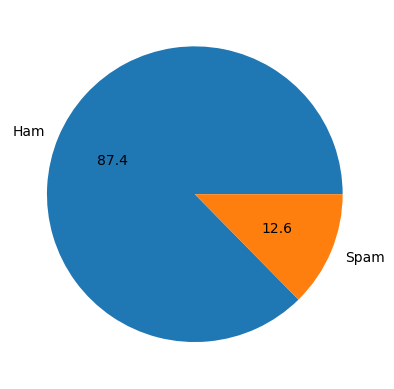

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['category'].value_counts(),labels=['Ham','Spam'],autopct="%0.1f")
plt.show()

Data is imbalanced

#### NLTK- we will use this to do a word count , a character count on the messages

In [21]:
!pip install nltk

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anushkaghosh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters']=df['text'].apply(len)

In [24]:
df.head()

,category,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#we will get the number of words
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568    [Will, ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ...
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [26]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [27]:
df.head()

,category,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568    [Will ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ...
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [29]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,category,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,1790.388276,18.456761,1.966531
std,6615.201453,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,63.000000,15.000000,1.000000
75%,132.000000,26.000000,2.000000
max,98436.000000,220.000000,38.000000


Count for ham messages

In [32]:
df[df['category']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,1026.317759,17.123782,1.820195
std,5313.344093,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,101.000000,22.000000,2.000000
max,98436.000000,220.000000,38.000000


Count for spam messages

In [33]:
df[df['category']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,7074.526799,27.675345,2.978560
std,10925.071763,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,137.000000,25.000000,2.000000
50%,156.000000,29.000000,3.000000
75%,16526.000000,32.000000,4.000000
max,73850.000000,46.000000,9.000000


In [34]:
#lets plot a histogram
import seaborn as sns


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

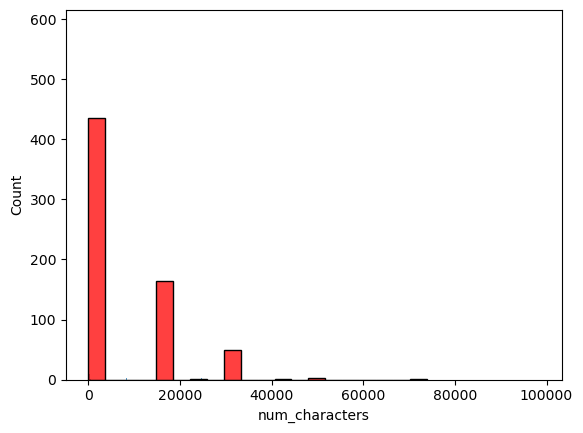

In [35]:
sns.histplot(df[df['category']==0]['num_characters'])
sns.histplot(df[df['category']==1]['num_characters'],color='red')

Most of the spam messages are constructed using a greater number of characters on an average

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

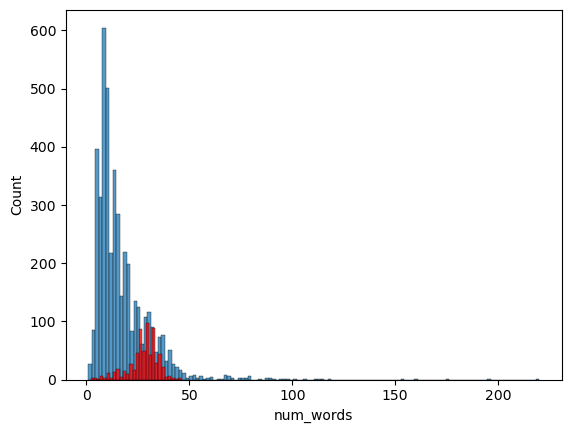

In [36]:
sns.histplot(df[df['category']==0]['num_words'])
sns.histplot(df[df['category']==1]['num_words'],color='red')

A similar observation is seen for number of words as well

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


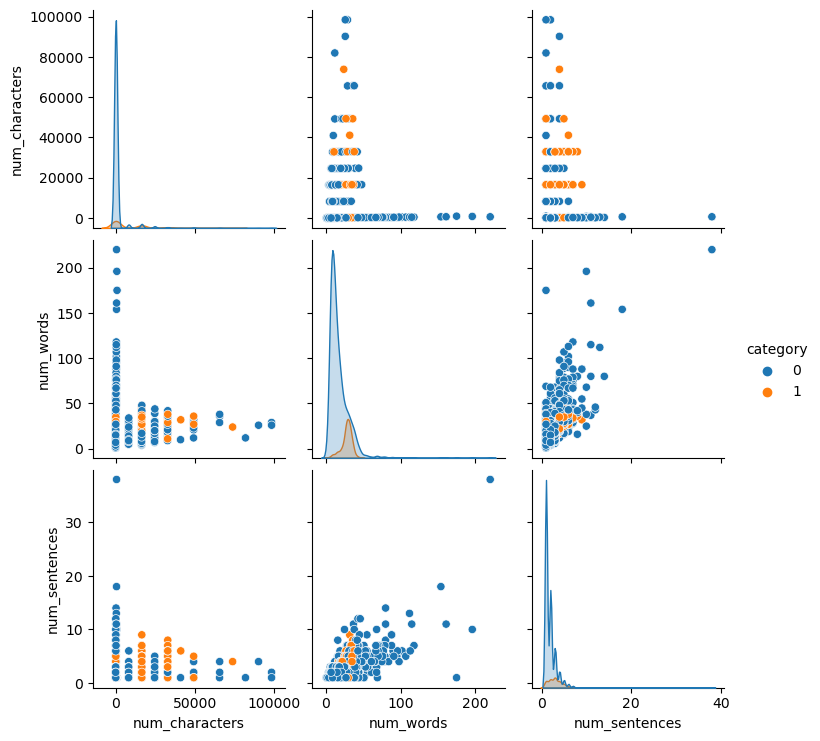

In [37]:
#lets plot the pairwise bivariate distributions 
sns.pairplot(df,hue='category')

The main oberservation is the presence of outliers in the dataset

### DATA PREPROCESSING
In this case it is , text preprocessing and it would be carried out in the following steps
1. Convert the characters into lower case
2. Tokenization
3. Removing Special Characters
4. Removing stop-words and punctuations
5. Stemming - convert words of similar type into one

   

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anushkaghosh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:

from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Stopwords are basically all those words that dont have any contribution to the overall meaning of the sentence   

In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [42]:
#creating a function to do all the steps sequentially
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:] #we have to do cloning
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i) 
    text=y[:]
    y.clear()
    for i in text:
       y.append(ps.stem(i))

    return " ".join(y) #to return it as a string

In [43]:
#testing on dummy data
transform_text('I loved the youtube lecture on machine learning,how about you ?')
               

'love youtub lectur machin learn'

In [44]:
#testing on one of the actual data records
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [45]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [46]:
#applying the transformation to the dataset
df['transform_text']=df['text'].apply(transform_text)

#### We want to see which words are used the most in both spam and ham messages

In [47]:
spam_corpus=[]
for msg in df[df['category']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [48]:
len(spam_corpus)

9936

In [49]:
from collections import Counter
Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [50]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


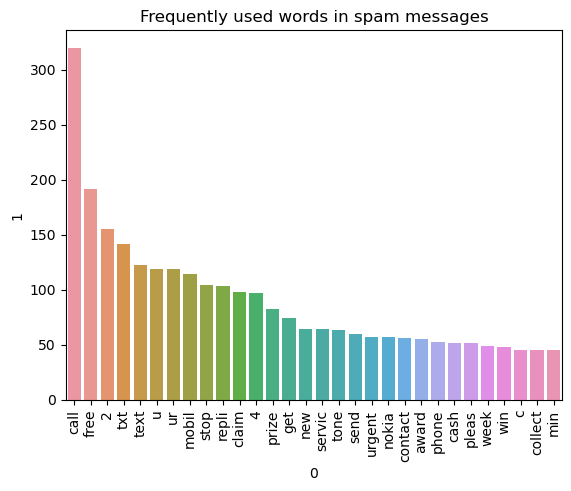

In [51]:
import seaborn as sns
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title("Frequently used words in spam messages")
plt.show()

In [52]:
ham_corpus=[]
for msg in df[df['category']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [53]:
len(ham_corpus)

35305

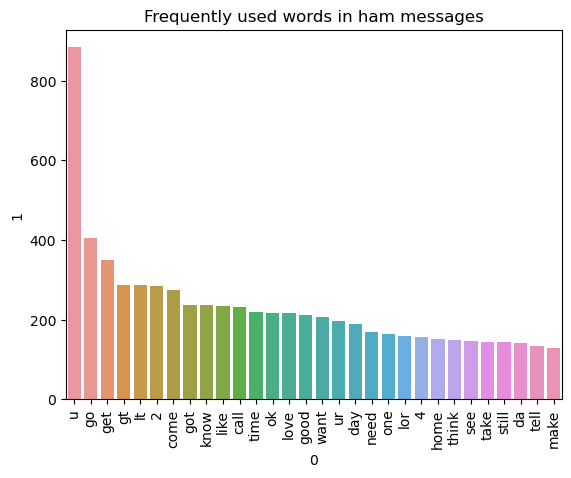

In [54]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title("Frequently used words in ham messages")
plt.show()

## Model building - Naive Baye's
It is known that the model that performs best on textual data is the naive baye's , so we will first build a model based on that and build other models and compare

The input needs to be in numbers- that is done through vectorization
#### Vectorization through bag of words


In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [56]:
X=cv.fit_transform(df['transform_text']).toarray()

In [57]:
X.shape  

(5169, 6674)

In [58]:
y=df['category'].values

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

#### Results of the Gaussian Naive Bayes Model

In [63]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


#### Results of the Multinomial Naive Bayes Model

In [64]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


#### Results of the Bernoulli Naive Bayes Model

In [65]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


#### Lets try to use TfidVectorizer for our model building

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
tfidf=TfidfVectorizer(max_features=3000) 
#we can try to restrict our model to use the most frquenty used 3000 words instead of takin all the unique words

In [82]:
X=tfidf.fit_transform(df['transform_text']).toarray()
y=df['category'].values

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [84]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8733075435203095
[[791 105]
 [ 26 112]]
0.5161290322580645


In [85]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [86]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


##### Since, our model should be more focused on false positives we will take the multinomial naive bayes with TfidfVectorizor ,because it has a precision score of 1. Here,accuracy_score is not a good measure because the data is imbalanced

#### tfidf->MNB

### Improving our model 

We have performed our experimentation using scacling and changing the value of max features of the tfidf but not much improvement was seen

### Making the model

In [93]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))